In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# Config parameters

FILE_PATH = "./data/"
TRAIN_PATH_INPUT = FILE_PATH + 'input_training_IrTAw7w.csv'
TRAIN_PATH_OUTPUT = FILE_PATH + 'output_training_F2dZW38.csv'

RANDOM_SEED = 10086

In [12]:
# Read data

f_total = pd.read_csv(TRAIN_PATH_INPUT, header=0, index_col=0)
Y_total = pd.read_csv(TRAIN_PATH_OUTPUT, index_col=0)
df_total.head()

,X1,X2,X3,X4,X5,I1_lag0,I1_lag1,I1_lag2,I1_lag3,I1_lag4,...,I10_lag38,I10_lag39,I10_lag40,I10_lag41,I10_lag42,I10_lag43,I10_lag44,I10_lag45,I10_lag46,I10_lag47
ID,,,,,,,,,,,,,,,,,,,,,
0,0.460020,0.620360,-0.972192,2.745197,4.177783,2.325865,2.060138,0.071162,2.360597,-0.611526,...,-0.342912,-0.194165,0.122331,0.028682,-0.093626,-0.559840,0.562584,-0.557868,1.424906,-0.016294
1,-0.347872,-2.199925,-0.222026,3.741888,8.608291,-4.091293,-3.502499,-1.463631,0.383153,-3.669962,...,1.261341,-0.082428,-1.035813,-0.249607,-0.971215,-0.058408,1.460632,-0.653394,-1.743487,4.065305
2,-2.152963,-0.432461,1.619057,-0.003912,3.870262,-0.598858,-0.412391,-0.765354,-0.998152,-0.938755,...,2.245204,3.002347,2.674186,2.656251,1.062974,-0.484619,-0.044594,1.579731,0.962836,1.146983
3,-1.827669,-1.881770,-4.214322,0.178225,0.992362,0.383757,2.512478,-0.383434,-0.208506,-1.104289,...,1.383203,-1.338892,0.298076,1.808275,2.837975,2.054112,0.741138,1.701911,0.110082,0.114980
4,0.748761,1.799939,1.561006,5.204120,2.161637,-1.275226,-1.544131,-1.802590,-1.128526,-0.469835,...,-0.477313,0.742923,-0.273225,1.311015,0.744330,2.914322,1.030602,0.480722,-0.492838,1.377958


In [24]:
# Split data into training and testing set

df_train, df_test, y_train, y_test = train_test_split(df_total, Y_total,
                                                     random_state=RANDOM_SEED)

y_train.to_csv(FILE_PATH + 'trainY.csv')
df_train.to_csv(FILE_PATH + 'trainDF.csv')

y_test.to_csv(FILE_PATH + 'testY.csv')
df_test.to_csv(FILE_PATH + 'testDF.csv')

# Statistical descriptive analysis

## Distribution of data

In [53]:
# Reduce dimension of data to visualize
# In order to peek the joint distribution and topology of data
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca, tsne = PCA(n_components=2), TSNE(n_components=2, n_jobs=-1)

df_tsne = pca.fit_transform(df_train/df_train.std())
df_pca = tsne.fit_transform(df_train)

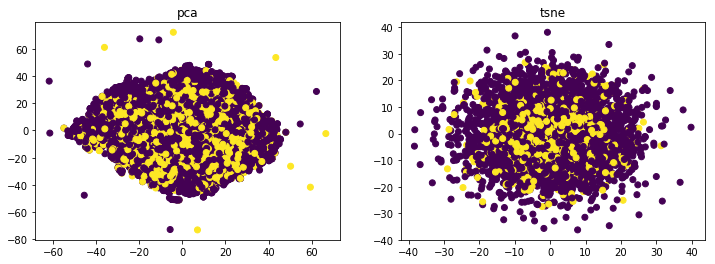

In [64]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.scatter(df_pca[:,0], df_pca[:,1], c=y_train['Target 0'])
ax1.set_title('pca')


ax2 = plt.subplot(1,2,2)
ax2.scatter(df_tsne[:,0], df_tsne[:,1], c=y_train['Target 0'])
ax2.set_title('tsne')
plt.show()

* According to PCA, there are few substantial outliers 
* The data seems to distribute normally

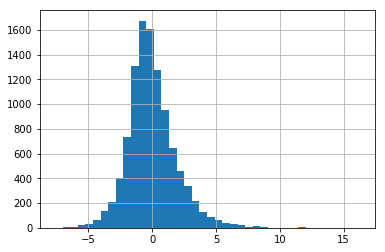

In [43]:
df_train.I1_lag0.hist(bins=40)